# ts2g using proximity networks strategy

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from core import model 
from timeseries.proximity_networks import ProximityNetwork 
# from timeseries.strategies import TimeseriesToGraphStrategy

## Loading data 

We first load the dataset :)

In [3]:
amazon_data = pd.read_csv(os.path.join(os.getcwd(), "amazon", "AMZN.csv"))   

To properly use the ‘Date’ column, we convert it to datetime format and ensure the dates are recognized as date objects. We then set the ‘Date’ column as the index of the DataFrame. This creates a time-series structure, facilitating analysis and visualization over time.

In [4]:
amazon_data["Date"] = pd.to_datetime(amazon_data["Date"])
amazon_data.set_index("Date", inplace=True)

In [5]:
segment_1 = amazon_data[60:120]
segment_2 = amazon_data[4000:4060]
segment_3 = amazon_data[6000:6060]

In [6]:
timeseries_1 = segment_1["Close"].values 
timeseries_2 = segment_2["Close"].values 
timeseries_3 = segment_3["Close"].values 

In [7]:
def create_proximity_network(time_series, method="cycle", segment_length=10, threshold=0.5, k=5, epsilon=0.5, recurrence_type = 'None'):
    proximity_network= ProximityNetwork(time_series, method=method, segment_length= segment_length, threshold=threshold, k=k, epsilon=epsilon)
    proximity_network.create_network(recurrence_type)

## CycleNetwork

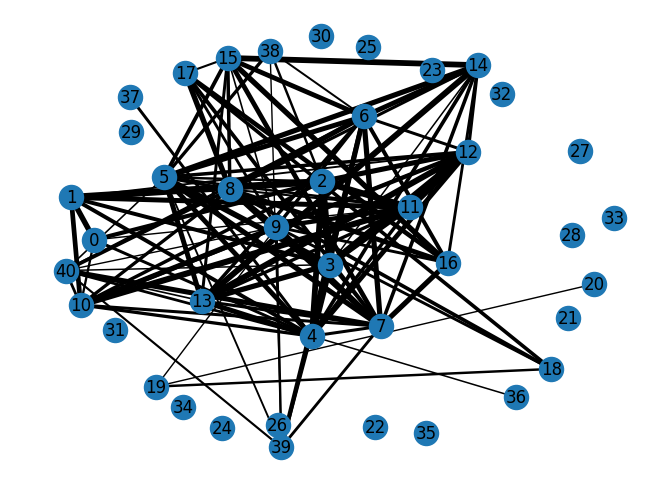

In [16]:
create_proximity_network(timeseries_1, segment_length=20, threshold=0.8)

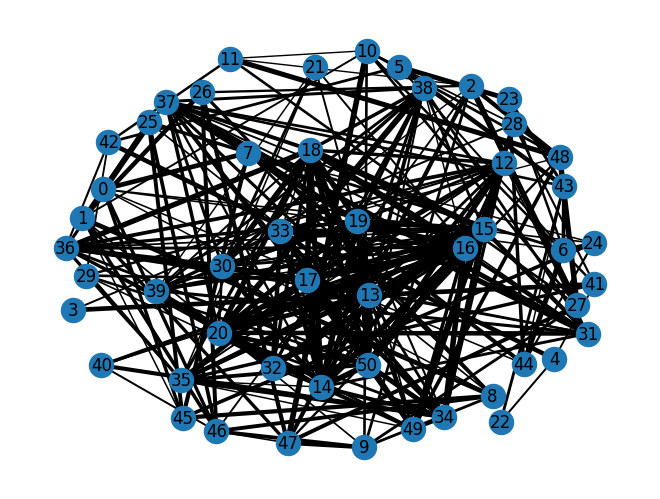

In [14]:
create_proximity_network(timeseries_2)

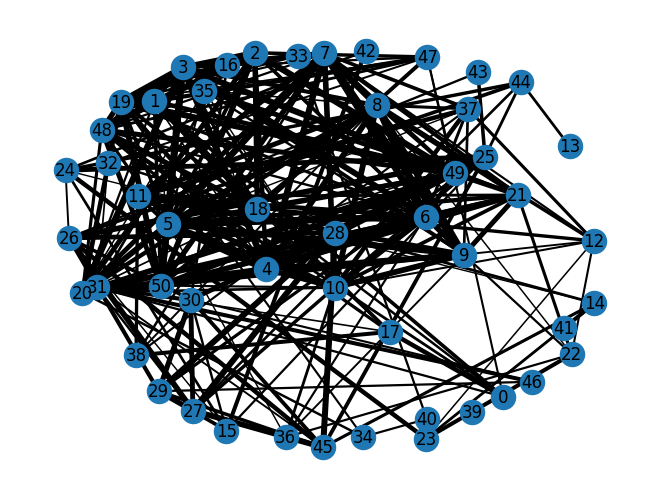

In [15]:
create_proximity_network(timeseries_3)

## CorrelationNetwork

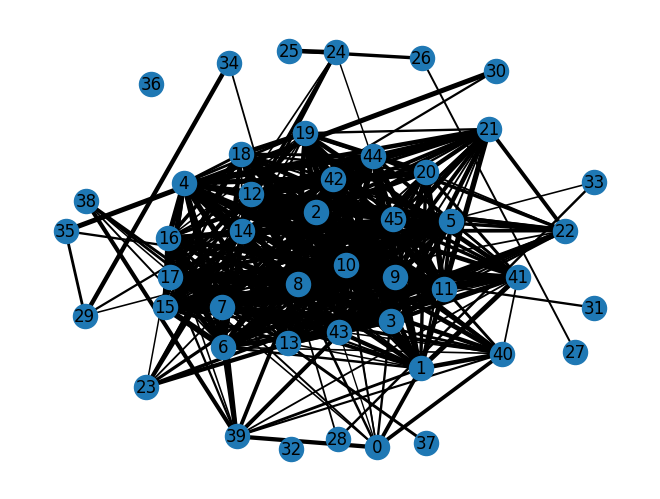

In [67]:
create_proximity_network(timeseries_1, method="correlation", segment_length=15, threshold=0.6)

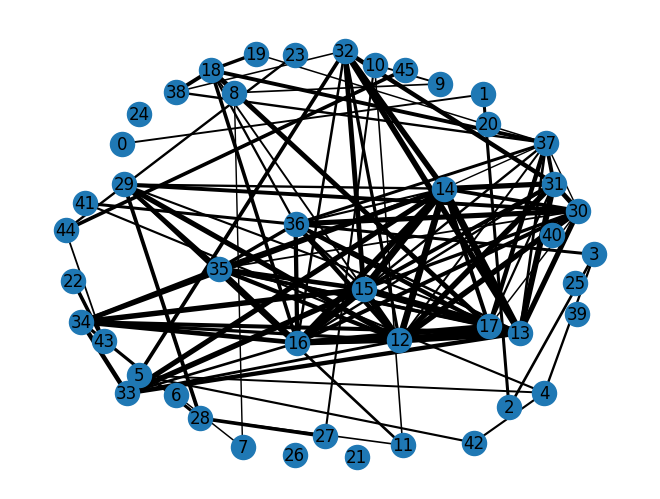

In [68]:
create_proximity_network(timeseries_2, method="correlation", segment_length=15, threshold=0.6)

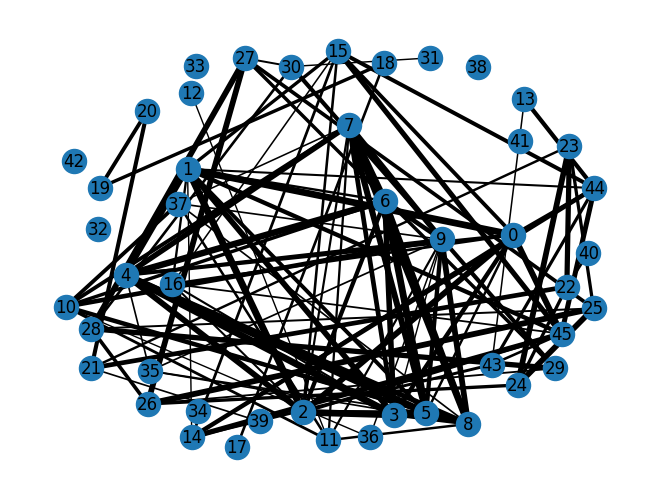

In [69]:
create_proximity_network(timeseries_3, method="correlation", segment_length=15, threshold=0.6)

## RecurrenceNetwork

### ε-Recurrence

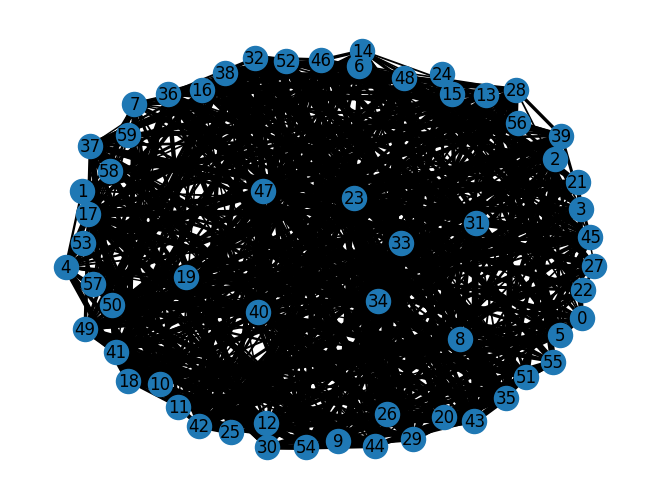

In [73]:
create_proximity_network(timeseries_1, method="recurrence", recurrence_type = "epsilon")

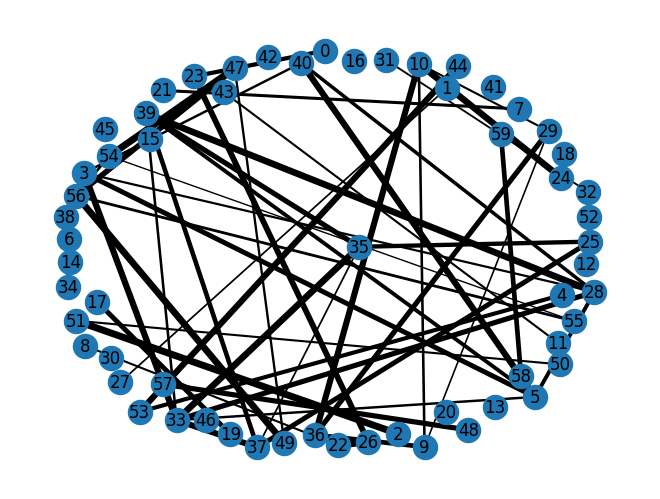

In [74]:
create_proximity_network(timeseries_2, method="recurrence", recurrence_type = "epsilon")

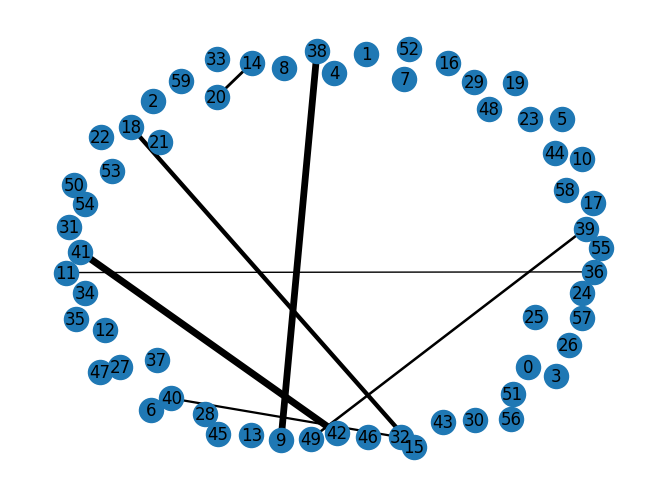

In [76]:
create_proximity_network(timeseries_3, method="recurrence", recurrence_type = "epsilon")

### k-NNN (for k-nearest neighbor)

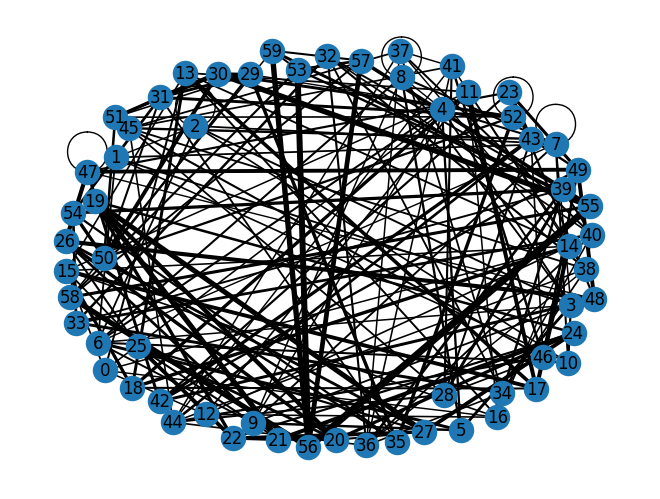

In [77]:
create_proximity_network(timeseries_1, method="recurrence", recurrence_type = "k-nnn")

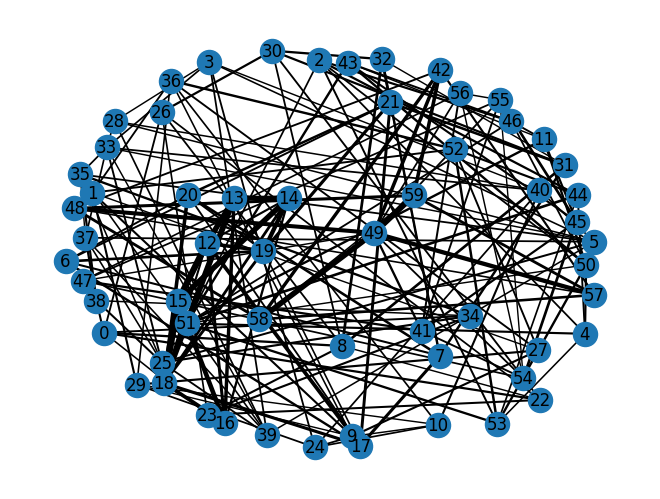

In [78]:
create_proximity_network(timeseries_2, method="recurrence", recurrence_type = "k-nnn")

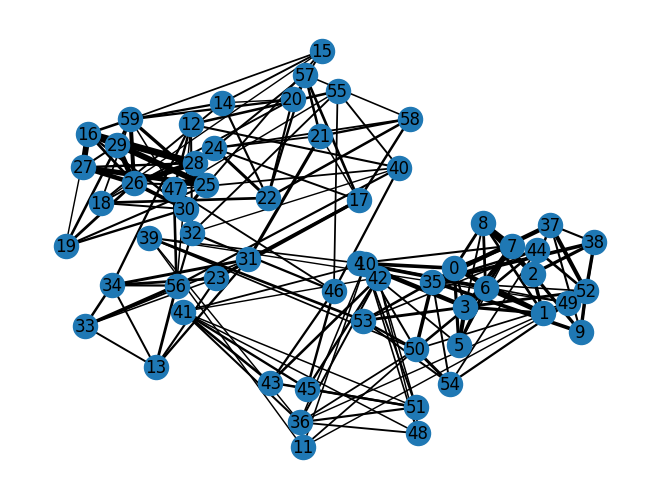

In [79]:
create_proximity_network(timeseries_3, method="recurrence", recurrence_type = "k-nnn")

### ANNN for adaptive nearest neighbor network

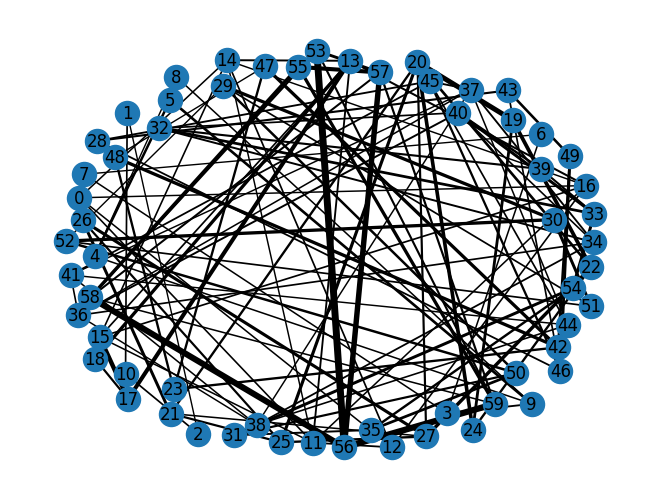

In [81]:
create_proximity_network(timeseries_1, method="recurrence", recurrence_type="annn")

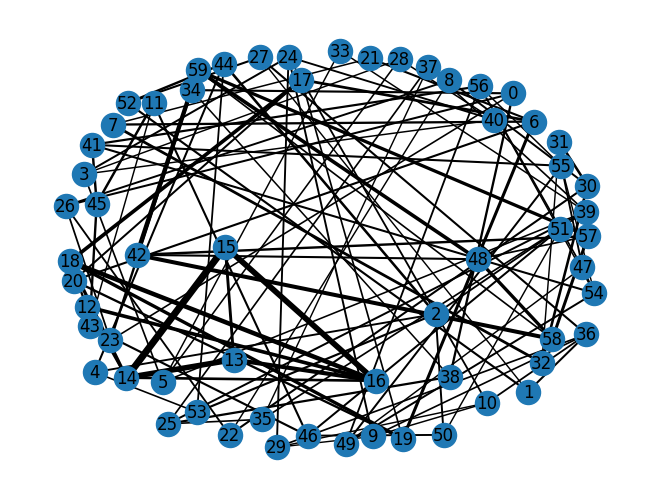

In [82]:
create_proximity_network(timeseries_2, method="recurrence", recurrence_type="annn")

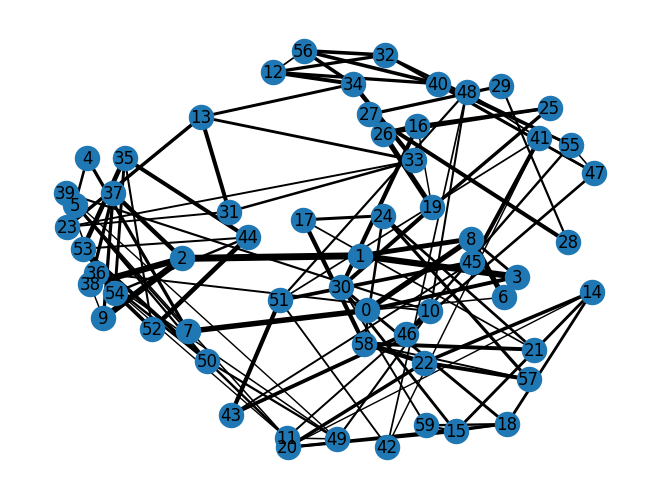

In [83]:
create_proximity_network(timeseries_3, method="recurrence", recurrence_type="annn")